In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
%matplotlib inline

# read csv data
data = pd.read_csv('banana_data.csv',header=None)
X = data.values[:,1:]
y = data.values[:,0]

# splite data into training set and testing set with the rato 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
data.head(5) 

,0,1,2
0,-1.0,-3.089839,-0.831686
1,-1.0,-2.980834,-0.159575
2,-1.0,-2.836057,-0.177081
3,-1.0,-2.767849,0.096217
4,-1.0,-2.600350,0.216772


In [15]:
n,_ = X_train.shape # n is the number of samples in training set
num_iterations = 50  # set the number of iterations. now we have 10
classifier = [] # save classifiers. In Adaboost, each iteration we have a weighted classifier
classifier_weights = [] # save classifiers' weight. Using this weight and classifiers we aggregate them to get a file classify

d = np.ones(n) / n # Initially, before training, the weight of all samples form uniformed distribution (equally)

for t in range(num_iterations):
    h = DecisionTreeClassifier(max_depth=3,criterion='entropy') # initialize a Decision Tree Classifier using sklearn
    h.fit(X_train, y_train, sample_weight=d) # fit the model using training set. the give our d to sample_weight
    pred = h.predict(X_train) # predict the training data for futher error and weight calculation

    eps = 0.5 - 0.5 * d.dot(y_train * pred) # calculate weighted classification error epsilon !=
    alpha = (np.log(1 - eps) - np.log(eps)) / 2.0 # calculate alpha based on epsilon

    d = d * np.exp(- alpha * y_train * pred) # calculate new sample weight
    d = d / d.sum() # make sure the all new weights sum to one

    classifier.append(h) # save current classifer
    classifier_weights.append(alpha) # save the weight of current classifier


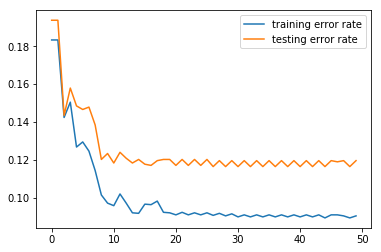

In [16]:
# predict function is based on h_N(x) = alpha_1 h_1(x) + ... + alpha_N h_1(N) (N is the number of classifiers)
def predict(X):
    pred = 0.0
    for (h, alpha) in zip(classifier, classifier_weights):
        pred += alpha * h.predict(X)
    pred = np.sign(pred)
    return pred

# calculate the error rate. num_error_prediction / total_number
def get_error(pred, truth):
    result = [p == h for (p,h) in zip(pred, truth)]
    num_error = list(result).count(False)
    return num_error * 1.0 / len(pred) 

# plot the training and testing error.
error_train = []
error_test = []
pred_train = 0.0
pred_test = 0.0
for (h, alpha) in zip(classifier, classifier_weights): # each time we output a result consider the ith round of the Adaboost.
    pred_train += alpha * h.predict(X_train) # sum up each weight classifier prediction of training data
    pred_test += alpha * h.predict(X_test) # sum up each weight classifier prediction of testing data
    error_train.append(get_error(np.sign(pred_train), y_train)) # save each round Adaboost result of training data
    error_test.append(get_error(np.sign(pred_test), y_test)) # save each round Adaboost result of testing data
# print error_train,error_test
plt.plot(error_train, label='training error rate')
plt.plot(error_test, label='testing error rate')
plt.legend()
plt.show()

from the figure, we could observe that the error in training data descrese with the increase of number of round. 
Testing error descrease but will not continue as training data. When the testing error dosen't descrease or even 
increase, and becoming stable, we can stop training now.
